#  CNN(Keras)

![](../../picture/tf_CONV.png)

这里我们使用CNN(Tensorflow)中的模型.

In [8]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dropout,Activation,Flatten,Dense
from keras.layers import Conv2D,MaxPooling2D
from keras.datasets import mnist

import matplotlib.pyplot as plt

## Load Datasets

加载数据和之前是一样的,这里就不在多说了,其数据的形状为:$data:(m,n_h,n_w,n_c),labels:(m,n_{classes})$

In [6]:
def Load_data(index,limit_train,limit_test):
    """
    Load data set.
    Arguments:
    ---------
        index: show minist digits index.
        limit_train: sample limit of training set,in this case, choose 10K.
        limit_test: sample limit of validation set,in this case,choose 0,1K.
    Returns:
    -------
        x_train: training data set. divide by 255.-->normal
        x_test: testing data set. divide by 255.-->normal
        y_train: training data labels. It's a hot vector, shape is (m,n_classes).
        y_test: testing data labels,a hot vector,shape is (m,n_classes).
    """
    (X_train,Y_train),(X_test,Y_test) = mnist.load_data()
    x_train = X_train[:limit_train,...].reshape(-1,28,28,1)
    x_test = X_test[:limit_test,...].reshape(-1,28,28,1)
    
    n_classes = 10
    y_train = keras.utils.to_categorical(Y_train[:limit_train],n_classes)
    y_test = keras.utils.to_categorical(Y_test[:limit_test],n_classes)
    
    print('x_train reshape:\n',x_train.shape)
    print('x_test reshape:\n',x_test.shape)
    print('y_train shape:\n ',y_train.shape)
    print('y_test shape:\n ',y_test.shape)
    print('The Number is:{}'.format(Y_train[index]))
    plt.imshow(X_train[index],cmap='gray')
    plt.show()
    
    return x_train/255,x_test/255,y_train,y_test

x_train reshape:
 (60000, 28, 28, 1)
x_test reshape:
 (10000, 28, 28, 1)
y_train shape:
  (60000, 10)
y_test shape:
  (10000, 10)
The Number is:0


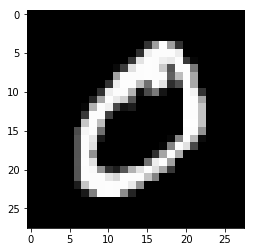

In [7]:
x_train,x_test,y_train,y_test = Load_data(1,60000,10000)

## Keras of CNN Model

接下去我们使用Keras搭建CNN模型,其网络结构为:

Input(28,28,1)-->CONV1(28,28,32)-->Relu1-->MaxPool1(28,28,32)-->CONV2(28,28,64)-->Relu2-->MaxPool2(28,28,64)-->Flatten-->FC3(1024)-->Dropout(0.3)-->FC4(10).

[1] [Conv2D](https://keras.io/zh/layers/convolutional/#conv2d)

- 遵循默认```cnannels_last```也即是:$(batch,N_h,N_w,N_c)$

- filters:卷积核个数

- kernel_size: 卷积核形状,int类型($F_h=F_w=int$)或者tuple类型$(F_h,F_w)$

- strides:感受野步长,int类型($S_h=S_w=int$)或者tuple类型$(S_h,S_w)$

- padding:可以选择"same"或者"valid",需要注意的是大小写敏感.

[2] [MaxPooling2D](https://keras.io/zh/layers/pooling/#maxpooling2d)

- 遵循默认```cnannels_last```也即是:$(batch,N_h,N_w,N_c)$

- pool_size: 卷积窗口大小,int类型($P_h=P_w=int$)或者tuple类型$(P_h,P_w)$

- strides:感受野步长,默认为None,如果是None表示使用$(S_h=S_w=2)$,int类型($S_h=S_w=int$)或者tuple类型$(S_h,S_w)$

- padding:可以选择"same"或者"valid",需要注意的是大小写敏感.

[3] [Flatten](https://keras.io/zh/layers/core/#flatten)

- 遵循默认```cnannels_last```也即是:$(batch,N_h,N_w,N_c)$

- 如果是```cnannels_last```,则输出为```(batch,-1)```

In [17]:
def CNN_Model(data,labels,val_data,val_laebls,epochs,lr,BATCH_SIZE):
    """
    Build Keras of CNN Model.
    
    Arguments:
    ---------
        data: training data set,the shape is (m,n_h,n_w,n_c).
        labels: training data labels,the shape is (m,n_classes).
        val_data: validation data set,shape equal data's shape.
        val_laebls: validation labels,shape equal labels's shape.
        epochs: Number of iterate.
        lr: learning rate.
        BATCH_SIZE: batch size.
    Return:
    ------
        model: keras model.
    """
    
    _,n_clsses = labels.shape
    model = Sequential() # create Sequential model.
    ################ start build Keras of CNN Model #######################################################
    model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='same',input_shape=data.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
    model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_clsses))
    model.add(Activation('softmax'))
    ################# end of CNN model #####################################################################
    optimizer = keras.optimizers.adam(lr=lr)
    
    model.compile(loss='categorical_crossentropy',
                 optimizer = optimizer,
                 metrics=['accuracy'])
    
    model.fit(data,labels,batch_size=BATCH_SIZE,epochs=epochs,validation_data=(val_data,val_laebls),shuffle=True)
    
    return model

In [19]:
model = CNN_Model(x_train,y_train,x_test,y_test,epochs=6,lr=1e-4,BATCH_SIZE=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 120s 2ms/step - loss: 0.2935 - acc: 0.9180 - val_loss: 0.0819 - val_acc: 0.9752
Epoch 2/6
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0783 - acc: 0.9765 - val_loss: 0.0503 - val_acc: 0.9835
Epoch 3/6
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0552 - acc: 0.9839 - val_loss: 0.0360 - val_acc: 0.9879
Epoch 4/6
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0436 - acc: 0.9868 - val_loss: 0.0322 - val_acc: 0.9896
Epoch 5/6
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0361 - acc: 0.9889 - val_loss: 0.0289 - val_acc: 0.9898
Epoch 6/6
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0301 - acc: 0.9911 - val_loss: 0.0309 - val_acc: 0.9891


可以看到经过6个epoch后,train acc为0.9911,val acc为0.9891,结果是可以接受的.

## Save Model And Load Model

保存模型,我们只需要运行```model.save```即可,给予的数据格式是```h5```,所以需要确保已经安装了```HDFF5```模块.

加载模型,我们只需要运行```load_model```即可,给予保存时候的文件```.h5```.

In [20]:
def SaveModel(model,model_name,model_dir='keras_save_model'):
    """
    Save Model.
    
    Arguments:
    ---------
        model: keras model.
        model_name: model name,it's ".h5" file.
        model_dir: dir default "./keras_save_model/"
    """
    import os
    if not os.path.isdir(model_dir):
        os.mkdir(model_dir)
    model_path = os.path.join(model_dir,model_name)
    model.save(model_path)
    print('Model Saved at %s'% model_path)

In [22]:
SaveModel(model,'mnist_model.h5')

Model Saved at keras_save_model/mnist_model.h5


保存好模型之后,我们加载模型并预测训练集的前两个样本.

In [39]:
def LoadModel(model_path,data,labels):
    """
    Load model.
    
    Arguments:
    ---------
        model_path: save model path, it's ".h5" file.
        data: predict data.
    """
    from keras.models import load_model
    
    model = load_model(model_path)
    predict = np.argmax(model.predict(data),axis=1)
    for i,value in enumerate(predict):
        print('The {} picture,predict:{},the ture label:{}'.format(i,value,np.argmax(labels[i])))

In [40]:
LoadModel('keras_save_model/mnist_model.h5',x_train[:2],y_train[:2])

The 0 picture,predict:5,the ture label:5
The 1 picture,predict:0,the ture label:0


另外还有其他保存模型并调用的方式;

第一种是只保存权重而不保存模型的结构:

```python
# save and load weights
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')```

第二种是用```model.to_json```保存完结构之后,然后再去加载这个```json_string```.

```python
# save and load fresh network without trained weights
from keras.models import model_from_json
json_string = model.to_json()
model = model_from_json(json_string)```